# Exam lab - Krzysztof Wolny

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss

## Ex 1

In [100]:
n = 5000
X = np.random.uniform(0, np.pi, size=(n, 10))
Y = (np.sum(np.sin(X)[:,:4], axis=1) >= 2.5).astype(int)


In [101]:
X.shape

(5000, 10)

In [102]:
Y.shape

(5000,)

In [103]:
np.sum(Y)

2674

## Ex 2

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)


In [107]:
m = 5
B = 100


def rsm_fit_predict(m, B):
    predictions = []
    cols = np.array([i for i in range(10)])
    for i in range(B): 
        sample = resample(cols, replace=False, n_samples=m)
        x_tr = X_train[:, sample]
        x_te = X_test[:, sample]
        dtc = DecisionTreeClassifier(max_depth=3)
        dtc.fit(x_tr, y_train)
        pred = dtc.predict(x_te)
        predictions.append(pred)
    # majority voting
    rsm_pred = (np.sum(predictions, axis = 0) >= B/2).astype(int)
    return rsm_pred




In [ ]:
rsm_pred = rsm_fit_predict(m, B)
print("Accuracy for RSM: ", accuracy_score(y_test, rsm_pred))

0.7716

In [ ]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
print("Accuracy for DecisionTreeClassifier: ", accuracy_score(y_test, dtc_pred))

0.6996

In [113]:
results = []
for i in range(20): 
    rsm_pred = rsm_fit_predict(m, B)
    rsm_acc = accuracy_score(y_test, rsm_pred)

    dtc = DecisionTreeClassifier(max_depth=3)
    dtc = dtc.fit(X_train, y_train)
    dtc_pred = dtc.predict(X_test)
    dtc_acc = accuracy_score(y_test, dtc_pred)
    
    results.append((rsm_acc, dtc_acc))

results_df = pd.DataFrame(results, columns=["RSM", "DTC"])



In [115]:
results_df

,RSM,DTC
0,0.7988,0.6996
1,0.8184,0.6996
2,0.7924,0.6996
3,0.7600,0.6996
4,0.7904,0.6996
5,0.7436,0.6996
6,0.8076,0.6996
7,0.7600,0.6996
8,0.7548,0.6996
9,0.7576,0.6996


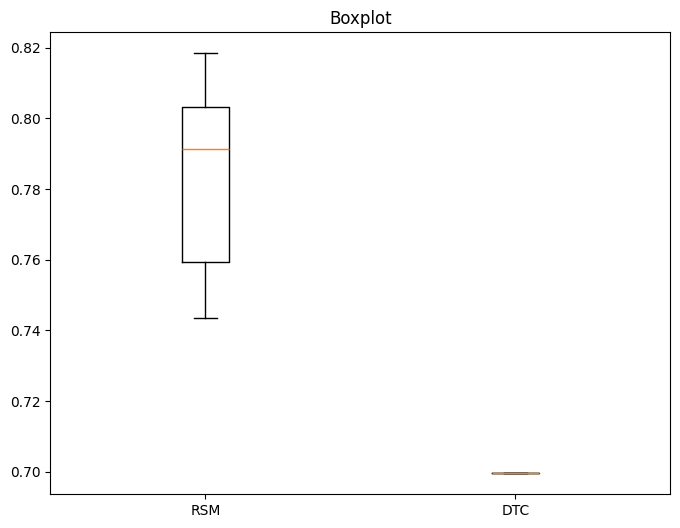

In [122]:
plt.figure(figsize=(8, 6))    

plt.boxplot(results_df)
plt.title("Boxplot")
plt.suptitle("")
plt.xticks(ticks=[1,2], labels=["RSM", "DTC"])
plt.show()

## Ex 3

In [123]:
from scipy.stats import norm

In [153]:
def g(x): 
    return 0.7 * norm.pdf(x, 3, 1) + 0.3 * norm.pdf(x, 6, 1)

def generate_regression_data(n): 
    x = np.random.uniform(0, 10, size=n)
    eps = np.random.normal(0, 0.05, n)
    return x, g(x) + eps

n = 1000
x, y = generate_regression_data(n)

In [168]:
def K(x, x_0, h):
    thr = 0.5*h
    return (np.abs(x - x_0) < thr).astype(int)

In [155]:
from sklearn.linear_model import LinearRegression

In [175]:
def klr(x_0, h):
    k = K(x, x_0, h)
    x_k = x[k == 1]
    y_k = y[k == 1]
    lr = LinearRegression(fit_intercept=True)
    lr.fit(x_k.reshape(-1, 1), y_k)
    theta_0, theta_1 = lr.intercept_, lr.coef_[0]
    return theta_0 + theta_1 * x_0

In [176]:
# h = 1
def y_res(x, h): 
    return np.array([klr(x_0, h) for x_0 in x])

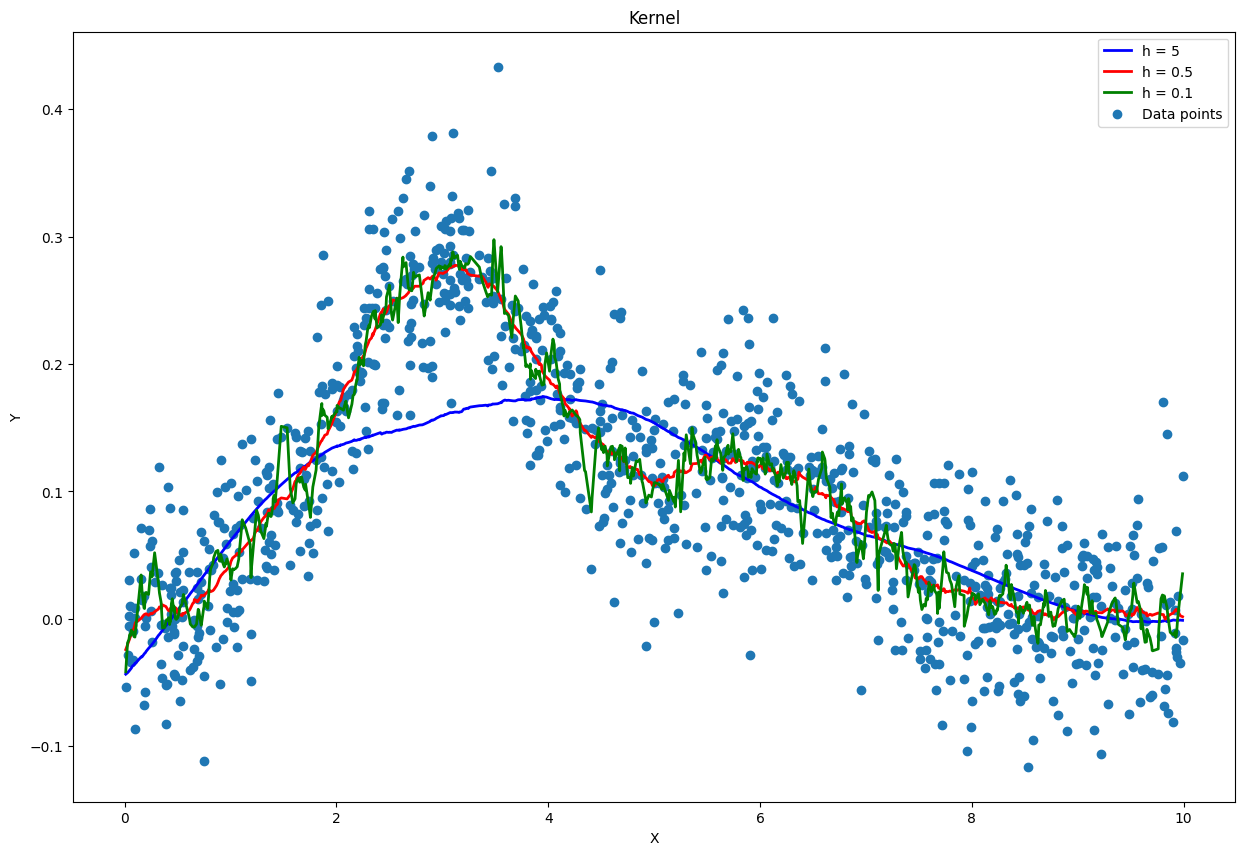

In [178]:
plt.figure(figsize=(15, 10))
sorted_indices = np.argsort(x)
plt.plot(x[sorted_indices], y_res(x, 5)[sorted_indices], "b-", label="h = 5", lw=2)
plt.plot(x[sorted_indices], y_res(x, 0.5)[sorted_indices], "r-", label="h = 0.5", lw=2)
plt.plot(x[sorted_indices], y_res(x, 0.1)[sorted_indices], "g-", label="h = 0.1", lw=2)
plt.scatter(x, y, label="Data points")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Kernel")
plt.legend()
plt.show()